<div style="border:solid green 2px; padding: 20px">

Привет! Меня зовут Алёна, и я буду проверять твою работу. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>❌Так выделены критичные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>✔️Так я выделяю успешные идеи, даю советы на будущее.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее 
    
   

<div class="alert alert-success">
<b>Комментарий ревьюера v2 ✔️:</b>

Привет, рада, что проект был доработан, он стал еще лучше :) Но трафик все еще округлен не так, как требовалось в условии :( Поправь, пожалуйста
    
Новые комментарии - с v2
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v3 ✔️:</b>

Привет, принимаю проект, отличная работа :) Желаю также успехов в дальнейшем обучении :)
    
Новые комментарии - с v3
</div>

# Проект №4 "Исследование тарифов федерального мобильного оператора Мегалайн" курс "Аналитик Данных" Яндекс.Практикум 
### Описание проекта
Вы аналитик компании «Мегалайн» (скорее всего яичная трехбуквенная экосистема) — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

#### Описание тарифов
##### Тариф «Смарт»
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей
##### Тариф «Ультра»
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Круто, что есть вступление. Проект выглядел бы еще лучше, если бы вступление содержало все следующие разделы:
    
____    
    
**Название проекта**
_____
**Описание исследования.**    
_____
**Цель исследования.**    
_____
**Задачи исследования.**

Что нужно сделать, чтобы достигнуть поставленной цели
_____
**Исходные данные.**
    
Копируешь описание данных
______

**Содержание**

Можно воспользоваться автообираемым оглавлением плагина toc. 
_________________


</div>

### 2.1. Прочтем файлы, приведем к нужным типам и исправим ошибки при наличие

In [1]:
import pandas as pd
import numpy as np
import math
from math import ceil
import numpy as np
from scipy import stats as st
import copy
import matplotlib.pyplot as plt
import seaborn as sns

try:
    calls = pd.read_csv(r'/datasets/calls.csv')
    internet = pd.read_csv(r'/datasets/internet.csv')
    messages = pd.read_csv(r'/datasets/messages.csv')
    users = pd.read_csv(r'/datasets/users.csv')
    tariffs = pd.read_csv(r'/datasets/tariffs.csv')
except:
    calls = pd.read_csv(r'D:\OneDrive\ds\project4\calls.csv') # Используем r для чтения файлов с диска на ОС "Виндоус"
    internet = pd.read_csv('D:\OneDrive\ds\project4\internet.csv')
    messages = pd.read_csv('D:\OneDrive\ds\project4\messages.csv')
    users = pd.read_csv(r'D:\OneDrive\ds\project4\users.csv')
    tariffs = pd.read_csv(r'D:\OneDrive\ds\project4\tariffs.csv')

In [2]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [3]:
smart_price = tariffs.iloc[0]['rub_monthly_fee']
ultra_price = tariffs.iloc[1]['rub_monthly_fee']
print(smart_price, ultra_price)

550 1950


### Шаг 2.2 Подготовка данных

<b>2.2.1. Таблица `calls` (информация о звонках):
</b>    
* <em>id</em> — уникальный номер звонка
* <em>call_date</em> — дата звонка
* <em>duration</em> — длительность звонка в минутах
* <em>user_id</em> — идентификатор пользователя, сделавшего звонок

In [4]:
calls.info()
calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [5]:
# Приведем столбцы к нужным типам данных
calls['id'] = calls['id'].astype(int)
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

# Округлим значения времени звонков вверх
def ceil_value(value):
    return math.ceil(value)
calls['duration'] = calls['duration'].apply(ceil_value)

# Добавим столбец с месяцем звонка
calls['month'] = calls['call_date'].dt.month

calls.info()
calls
calls['duration'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  int64         
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 7.7 MB


0     39613
7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
36        2
37        2
38        2
Name: duration, dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Классно, что для округления использована правильная функция(ceil). На будущее будет оптимальнее использовать `np.ceil()`. Она работает быстрее, и для нее не нужно использовать apply
    
    calls['duration'] = np.ceil(calls['duration'])  
    
</div>

In [6]:
#Создадим сводную таблицу по месяцам
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()
calls_pivot = calls_pivot.rename(columns={'duration':'calls_duration'})
calls_pivot.info()
calls_pivot.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         3174 non-null   int64
 1   month           3174 non-null   int64
 2   calls_duration  3174 non-null   int64
dtypes: int64(3)
memory usage: 74.5 KB


,user_id,month,calls_duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Все правильно
    
</div>

##### Выводы 2.2.1.
* Получили достаточное количество звонков с нулевой продолжительностью. Это могут быть неотвеченные вызовы. Не будем их убирать, т.к. они никак не повлияют на результаты исследования.
* Пропущенные значения в столбцах отсутствуют.
* Добавили столбец с месяцем совершенного звонка.
* Сократили количество строк до 3174


<b>2.2.2. Таблица `internet` (информация об интернет-сессиях):
</b>  
* <em>id</em> — уникальный номер сессии
* <em>mb_used</em> — объём потраченного за сессию интернет-трафика (в мегабайтах)
* <em>session_date</em> — дата интернет-сессии
* <em>user_id</em> — идентификатор пользователя

In [7]:
# Приведем столбцы к нужным типам данным
internet['id'] = internet['id'].astype(int)

#Добовим столбец с объемом использованных данных в ГБ
internet['gb_used'] = internet['mb_used'] / 1024
#print(internet['gb_used'].sum().round(1), '- количество ГБ потреблено в общем')
#internet['gb_used'] = np.ceil(internet['gb_used']).astype(int)
#print(internet['gb_used'].sum(), '- количество ГБ с округлениями по правилам тарифа, за которые оплатили клиенты')
#internet['gb_used'] = np.ceil(internet['gb_used']).astype(int)

#internet = internet.drop('Unnamed: 0', axis=1)
internet = internet.reindex()
internet['gb_used'] = np.ceil(internet['gb_used']).astype(int)
#internet = internet.reindex('id', 'gb_used', 'gb_used')

# Добавим столбец с месяцем звонка
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month
internet.info()
internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  int64         
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
 5   gb_used       149396 non-null  int64         
 6   month         149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 8.0 MB


,Unnamed: 0,id,mb_used,session_date,user_id,gb_used,month
0,0,10000,112.95,2018-11-25,1000,1,11
1,1,10001,1052.81,2018-09-07,1000,2,9
2,2,10002,1197.26,2018-06-25,1000,2,6
3,3,10003,550.27,2018-08-22,1000,1,8
4,4,10004,302.56,2018-09-24,1000,1,9
...,...,...,...,...,...,...,...
149391,149391,1499152,318.90,2018-10-03,1499,1,10
149392,149392,1499153,490.13,2018-12-14,1499,1,12
149393,149393,1499154,0.00,2018-10-27,1499,0,10
149394,149394,1499155,1246.32,2018-11-26,1499,2,11


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
`Unnamed: 0` возникает, когда данные сохраняют с указанием индекса `pd.DataFrame().to_csv(..., index=column)`. Если при чтении указать этот столбец `pd.read_csv(..., index_col=0)` - данные сразу прочитаются корректно.

</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>
    
Согласно условию использованный трафик округляется уже после суммирования:

    «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
    Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
    
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Применил округление.</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера v2 ❌:</b>
    
Я имела ввиду, что округлить надо после суммирования, а здесь 2 раза округлено до :( 
    
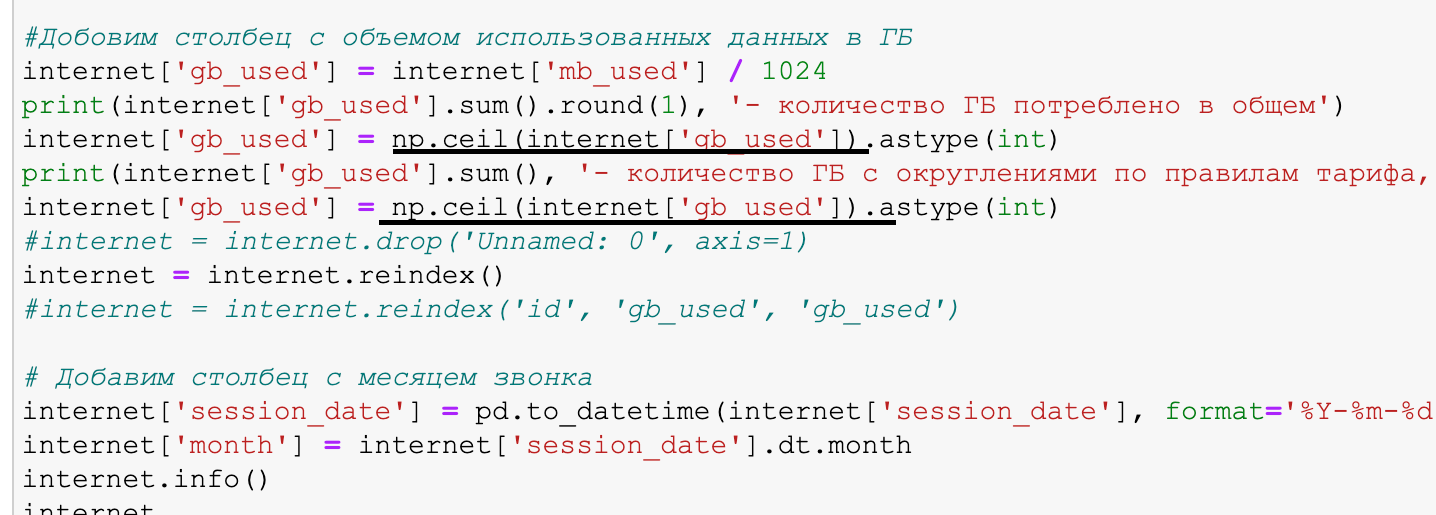

Также после этого хорошо бы опять исправить цифры в выводах :((
</div>


<div class="alert alert-info"> <b>Комментарий студента v2:</b> Перенес округление под строку `internet = internet.reindex()`.</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v3 ⚠️:</b> 
    
Округлять нужно было не здесь, а в internet_pivot, чтобы все было согласно условию :) 
</div>

In [8]:
# Создадим сводную таблицу нужных значений
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='gb_used', aggfunc='sum').reset_index()
internet_pivot

,user_id,month,gb_used
0,1000,5,4
1,1000,6,49
2,1000,7,28
3,1000,8,27
4,1000,9,26
...,...,...,...
3198,1498,10,50
3199,1499,9,5
3200,1499,10,44
3201,1499,11,41


Выводы 2.2.2:
* С помощью сводной таблицы сократили количество строк пользования Интернетом до 3203

#### 2.2.3. Таблица `messages` (информация о сообщениях):
* <em>id</em> — уникальный номер сообщения
* <em>message_date</em> — дата сообщения
* <em>user_id</em> — идентификатор пользователя, отправившего сообщение

In [9]:
# Приведем столбцы к нужным типам данных
messages['id'] = messages['id'].astype(int)
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

# Добавим столбцы с сообщениями за месяц и за год:
messages['month'] = messages['message_date'].dt.month
messages.info()
messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  int64         
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.8 MB


,id,message_date,user_id,month
0,10000,2018-06-27,1000,6
1,10001,2018-10-08,1000,10
2,10002,2018-08-04,1000,8
3,10003,2018-06-16,1000,6
4,10004,2018-12-05,1000,12
...,...,...,...,...
123031,1499179,2018-12-12,1499,12
123032,1499180,2018-09-28,1499,9
123033,1499181,2018-09-27,1499,9
123034,1499182,2018-11-15,1499,11


In [10]:
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count').reset_index()
messages_pivot = messages_pivot.rename(columns={'message_date' : 'messages_sum'})
messages_pivot

,user_id,month,messages_sum
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


#### Вывод 2.2.3
* Количество строк в таблице `messages` сократилось до 2717

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>

Здесь все отлично
    
</div>

#### 2.2.4. Таблица `users` (информация о пользователях):
* <em>user_id</em> — уникальный идентификатор пользователя
* <em>first_name</em> — имя пользователя
* <em>last_name</em> — фамилия пользователя
* <em>age</em> — возраст пользователя (годы)
* <em>reg_date</em> — дата подключения тарифа (день, месяц, год)
* <em>churn_date</em> — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* <em>city</em> — город проживания пользователя
* <em>tariff</em> — название тарифного плана

In [11]:
# Приведем столбцы к нужным типам данных
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

# Cоздадим таблицу tariff_id с категориями тарифов
def tariff_id(object):
    if object == 'smart':
        return 0 # False
    else:
        return 1 # True
users['tariff_id'] = users['tariff'].apply(tariff_id)
users.info()
users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
 8   tariff_id   500 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 35.3+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_id
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,0
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1
...,...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,1
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,0
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,0
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,0


Оставим только нужные столбцы в таблице users и проверим наличие дубликатов

In [12]:
users = users[['user_id', 'tariff', 'city']]
users = users.drop_duplicates()
users

,user_id,tariff,city
0,1000,ultra,Краснодар
1,1001,smart,Москва
2,1002,smart,Стерлитамак
3,1003,ultra,Москва
4,1004,ultra,Новокузнецк
...,...,...,...
495,1495,ultra,Иркутск
496,1496,smart,Вологда
497,1497,smart,Челябинск
498,1498,smart,Владикавказ


In [13]:
tariffs.iloc[1]['rub_monthly_fee']

1950

#### 2.2.5. Таблица `tariffs` (информация о тарифах):

In [14]:
tariffs['tariff_id'] = tariffs['tariff_name'].apply(tariff_id)

# Добавим столбец, в котором лимит трафика будет в ГБ
tariffs['gb_included'] = (tariffs['mb_per_month_included']/1024).astype(int)
#tariffs = tariffs.rename(columns={'rub_monthly_fee' : 'price_month'})

tariffs.info()

tariffs.drop(['mb_per_month_included'], axis=1, inplace=True)
tariffs = tariffs[['tariff_id', 'tariff_name',
                          'gb_included', 'minutes_included', 'messages_included',
                          'rub_per_message', 'rub_per_minute', 'rub_per_gb']]

tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
 8   tariff_id              2 non-null      int64 
 9   gb_included            2 non-null      int64 
dtypes: int64(9), object(1)
memory usage: 288.0+ bytes


,tariff_id,tariff_name,gb_included,minutes_included,messages_included,rub_per_message,rub_per_minute,rub_per_gb
0,0,smart,15,500,50,3,3,200
1,1,ultra,30,3000,1000,1,1,150


<b>Выводы 2.2.5:</b>
* Создал столбец `gb_included` с лимитом в ГБ на каждом из тарифов
* Отсортировал в таблице `tariffs` столбцы более комфортным образом.


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>

Предобработка данных сделана :)
    
</div>

### <i>Вывод шаг 2.2</i>
* Привели данные к нужным типам.
* Создали сводные таблицы, в которых посчитали количество потраченных минут, смс и трафика по месяцам

### 2.2. продолжение Создание сводных таблиц и объединение

In [15]:
# Объединим таблицы расходов пакетов
data = calls_pivot.merge(internet_pivot, on=['user_id', 'month'], how='outer')
data = data.merge(messages_pivot, on=['user_id', 'month'], how='outer')
# Объединим с таблицей пользователей их траты
data = data.merge(users, on=['user_id'], how='outer')
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3216 non-null   int64  
 1   month           3214 non-null   float64
 2   calls_duration  3174 non-null   float64
 3   gb_used         3203 non-null   float64
 4   messages_sum    2717 non-null   float64
 5   tariff          3216 non-null   object 
 6   city            3216 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 201.0+ KB


,user_id,month,calls_duration,gb_used,messages_sum,tariff,city
0,1000,5.0,159.0,4.0,22.0,ultra,Краснодар
1,1000,6.0,172.0,49.0,60.0,ultra,Краснодар
2,1000,7.0,340.0,28.0,75.0,ultra,Краснодар
3,1000,8.0,408.0,27.0,81.0,ultra,Краснодар
4,1000,9.0,466.0,26.0,57.0,ultra,Краснодар
...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,52.0,21.0,smart,Санкт-Петербург
3212,1489,11.0,NaN,46.0,20.0,smart,Санкт-Петербург
3213,1489,12.0,NaN,45.0,35.0,smart,Санкт-Петербург
3214,1128,NaN,NaN,NaN,NaN,ultra,Волжский


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>

Объединено правильно :)
    
Совет. Хорошая идея изначально сделать датафрейм пользователь - месяц, в котором для каждого пользователя есть каждый месяц, в котором он был клиентом(то есть все месяца от reg_date включительно до churn_date включительно). А потом присоединять таблицы уже к этому датафрейму по пользователю и месяцу.  

Такой вариант предпочтительнее в будущем, потому что даты могут выпадать. Часто с таким сталкиваюсь. Например, человек может совершать покупки не каждый месяц, и если не сделать изначально датафрейм месяц-дата, то у нас не будет записей по человеку за некоторые месяцы в результируюзем датафрейме, и может получиться немного не то распределение :) 
    
</div>

Для оптимизации проведем предобратоку данных общей таблицы

In [16]:
data['month'] = data['month'].fillna(0).astype(int)
data['calls_duration'] = data['calls_duration'].fillna(0).astype(int)
data['gb_used'] = data['gb_used'].fillna(0).astype(int)
data['messages_sum'] = data['messages_sum'].fillna(0).astype(int)
data['user_id'] = data['user_id'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         3216 non-null   int64 
 1   month           3216 non-null   int64 
 2   calls_duration  3216 non-null   int64 
 3   gb_used         3216 non-null   int64 
 4   messages_sum    3216 non-null   int64 
 5   tariff          3216 non-null   object
 6   city            3216 non-null   object
dtypes: int64(5), object(2)
memory usage: 201.0+ KB


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>

И это важный шаг :) Возможно стоит посмотреть на пользователей с нулем в месяце и удалить их, если нужно
    
</div>

### <i>Выводы продолжения  шага 2.2:</i>
* В созданной сводной таблице привели значения столбцов в типу int
* Заменили пропуски нулями


### 2.3. Помесячная выручка с каждого пользователя

In [17]:
# Изменение цифр на значения при обращении к ячейкам таблицы
def price(df):
    calls_duration = df['calls_duration']
    messages_sum = df['messages_sum']
    gb_used = df['gb_used']
    tariff = df['tariff']
# Рассчет выручки тарифа "Смарт"    
    if tariff == 'smart':
        if calls_duration > tariffs.iloc[0]['minutes_included']: #стоимость минут потраченных сверх тарифа
            #calls_above_limit_price = (calls_duration-500)*3 #стоимость минут потраченных сверх тарифа
            calls_above_limit_price = (calls_duration-tariffs.iloc[0]['minutes_included']) * tariffs.iloc[0]['rub_per_minute'] 
        else:
            calls_above_limit_price = 0
        if messages_sum > tariffs.iloc[0]['messages_included']: #стоимость сообщений потраченных сверх тарифа
            #messages_above_limit_price = (messages_sum-50)*3 #стоимость сообщений потраченных сверх тарифа
            messages_above_limit_price = (messages_sum-tariffs.iloc[0]['messages_included']) * tariffs.iloc[0]['rub_per_message']
        else:
            messages_above_limit_price = 0
        if gb_used > tariffs.iloc[0]['gb_included']: #стоимость гб потраченных сверх тарифа
            #gb_above_limit_price = (gb_used-15)*200 #стоимость гб потраченных сверх тарифа
            gb_above_limit_price = (gb_used-tariffs.iloc[0]['gb_included']) * tariffs.iloc[0]['rub_per_gb'] 
        else:
            gb_above_limit_price = 0
            
        #return calls_above_limit_price + messages_above_limit_price + gb_above_limit_price + 550 #общие траты за месяц "Smart"
        return calls_above_limit_price + messages_above_limit_price + gb_above_limit_price + smart_price #общие траты за месяц "Smart"

# Hccxtn выручки для тарифа Ультра
    elif tariff == 'ultra':
        if calls_duration > tariffs.iloc[1]['minutes_included']:
            #calls_above_limit_price = calls_duration-3000 #стоимость минут потраченных сверх тарифа
            calls_above_limit_price = calls_duration - tariffs.iloc[1]['minutes_included'] #стоимость минут потраченных сверх тарифа
        else:
            calls_above_limit_price = 0
        if messages_sum > tariffs.iloc[1]['messages_included']:
            #messages_above_limit_price = messages_sum-1000 #стоимость сообщений потраченных сверх тарифа
            messages_above_limit_price = messages_sum - tariffs.iloc[1]['messages_included'] #стоимость сообщений потраченных сверх тарифа
        else:
            messages_above_limit_price = 0
        if gb_used > tariffs.iloc[1]['gb_included']:
            #gb_above_limit_price = (gb_used-30)*150 #стоимость гб потраченных сверх тарифа
            gb_above_limit_price = (gb_used-tariffs.iloc[1]['gb_included'])*tariffs.iloc[1]['rub_per_gb'] #стоимость гб потраченных сверх тарифа
        else:
            gb_above_limit_price = 0
            
        #return calls_above_limit_price + messages_above_limit_price + gb_above_limit_price + 1950 #общие траты за месяц "Ultra"
        return calls_above_limit_price + messages_above_limit_price + gb_above_limit_price + ultra_price #общие траты за месяц "Ultra"
            
  
   
data['spent_this_month'] =  data.apply(price, axis=1) #новый столбец, функцию ко всей строке
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           3216 non-null   int64 
 1   month             3216 non-null   int64 
 2   calls_duration    3216 non-null   int64 
 3   gb_used           3216 non-null   int64 
 4   messages_sum      3216 non-null   int64 
 5   tariff            3216 non-null   object
 6   city              3216 non-null   object
 7   spent_this_month  3216 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 226.1+ KB


,user_id,month,calls_duration,gb_used,messages_sum,tariff,city,spent_this_month
0,1000,5,159,4,22,ultra,Краснодар,1950
1,1000,6,172,49,60,ultra,Краснодар,4800
2,1000,7,340,28,75,ultra,Краснодар,1950
3,1000,8,408,27,81,ultra,Краснодар,1950
4,1000,9,466,26,57,ultra,Краснодар,1950
...,...,...,...,...,...,...,...,...
3211,1489,10,0,52,21,smart,Санкт-Петербург,7950
3212,1489,11,0,46,20,smart,Санкт-Петербург,6750
3213,1489,12,0,45,35,smart,Санкт-Петербург,6550
3214,1128,0,0,0,0,ultra,Волжский,1950


<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> 
    
Посчитано верно, хорошая функция ✔️ 
    
Удобнее будет вместо того, чтобы явно писать в функции параметры тарифов обращаться к соответствующим полям таблицы tariffs. Иначе при изменениях цифр в тарифах придется вручную их переписывать :)
</div>

<div class="alert alert-info"> <b>Комментарий студента v2:</b> Обращаюсь в коде только к значениям таблицы tariffs. Внося численные изменения в тариф, изменятся результаты.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v3 ✔️:</b>

Можно сделать так:
    
    tariff_row = tariffs[tariffs.tariff_name == tariff].iloc[0]
    
И брать соответствующие параметры тарифов из tariff_row. Тогда не будет отдельных блоков кода для разных тарифов, останется только один общий
    
</div>

Информация по тарифу Ультра

In [18]:
data_ultra = data.query("tariff == 'ultra'")
data_ultra.describe()

,user_id,month,calls_duration,gb_used,messages_sum,spent_this_month
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,1262.957404,8.242394,526.089249,38.125761,49.313387,3842.494929
std,140.689268,2.882305,317.887549,19.592457,47.806040,2165.879726
min,1000.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,1143.000000,6.000000,282.500000,23.000000,6.000000,1950.000000
50%,1277.000000,9.000000,518.000000,38.000000,38.000000,3150.000000
75%,1381.000000,11.000000,751.750000,52.000000,78.750000,5250.000000
max,1495.000000,12.000000,1673.000000,98.000000,224.000000,12150.000000


Информация по тарифу Смарт

In [19]:
data_smart = data.query("tariff == 'smart'")
data_smart.describe()

,user_id,month,calls_duration,gb_used,messages_sum,spent_this_month
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
mean,1246.562332,8.343049,417.747534,42.399103,33.369058,6244.529596
std,146.110501,2.925006,190.476754,14.966731,28.230396,2895.582681
min,1001.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,6.000000,282.000000,34.000000,10.000000,4498.500000
50%,1240.000000,9.000000,421.500000,43.000000,28.000000,6350.000000
75%,1376.000000,11.000000,545.000000,52.000000,51.000000,8064.500000
max,1499.000000,12.000000,1435.000000,101.000000,143.000000,19370.000000


### <i>Выводы 2.3.</i>
* При расчете превышения лимитов, сделали допущение, что при использовании хотя бы 1 сек или 1 байта данных оплата спишется за полную минуту или гигабайт.
* Люди мало отправляют смс на любом из тарифов
* На обоих тарифах люди выходят за пределы тарифов и платят больше, чем абонплата
* На тарифе Смарт компания имеет бóльшую выручку, как в абсолютном, так и в относительном выражении
* Подавляющее число людей на тарифе Смарт платит от 4500 до 8000 р/м, что часто в 10 раз больше абонплаты 550р
* Половина юзеров тарифа Ультра платит больше 3150 р/м ежемесячно, что также больше абонплаты, которая составляет 1950 р/м.
* Половина пользователей платит почти на 1000 руб. больше, чем базовая стоимость тарифа Ultra, которая равняется 1950р.
* <b>Окночательный вывод: тариф Смарт приносит существенно больше денег, чем тариф Ультра по всем показателям. Подтвердим это графиками.</b>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>

Круто, что ты анализируешь тарифы уже здесь :)
    
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера  ❌:</b> 
    
Оставляю комментарий, так как после правильного округления гигабайт вывод может измениться
</div>

<div class="alert alert-info"> <b>Комментарий студента v2:</b> Выводы и цифры актуальны.</div>

## 3.1. Анализ тарифа Ultra
Минуты разговора в тарифе Ультра

Text(0, 0.5, 'Частота использования')

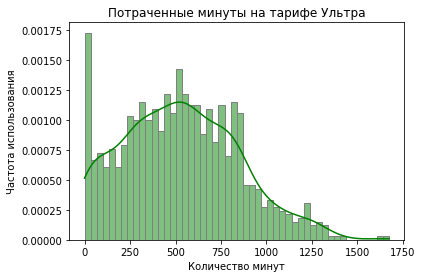

In [20]:
sns.histplot(data_ultra['calls_duration'],
             bins=50, kde=True,
             stat="density", linewidth=1,
             edgecolor = 'grey',
             color='green').set_title('Потраченные минуты на тарифе Ультра')
# Названия осей
plt.xlabel('Количество минут')
plt.ylabel('Частота использования')

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
 
График выглядит хорошо, есть подписи и название :)
    
В будущих версиях seaborn функции distplot не будет. Можно вместо нее использовать histplot, добавив    
    `kde=True, stat="density", linewidth=1, edgecolor = 'grey', color='green'`:
    
    sns.histplot(data, bins=..., kde=True, stat="density", linewidth=1, edgecolor = 'grey', color='green')

С помощью следующего кода можно убрать warnings, но лучше этого не делать на этапе написания кода:
    
    import warnings
    warnings.filterwarnings('ignore')
    

</div>

<div class="alert alert-info"> <b>Комментарий студента v1:</b> Все графики постороил заново по вашей рекомендации, благодарю!</div>

Отправленные СМС на тарифе Ультра

Text(0, 0.5, 'Частота использования')

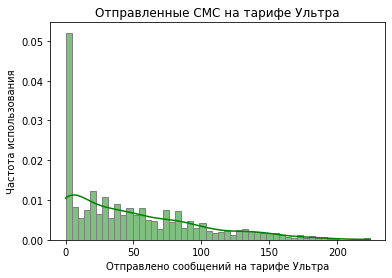

In [21]:
#sns.distplot(data_ultra['messages_sum'], hist=True,
#            bins=50, color='green', hist_kws={'edgecolor':'grey'}).set_title('Отправленные СМС на тарифе Ультра')
sns.histplot(data_ultra['messages_sum'],
             bins=50, kde=True,
             stat="density", linewidth=1,
             edgecolor = 'grey',
             color='green').set_title('Отправленные СМС на тарифе Ультра')
# Названия осей
plt.xlabel('Отправлено сообщений на тарифе Ультра')
plt.ylabel('Частота использования')

Интернет-трафик на тарифе Ультра

49.3 % от выручки тарифа Ультра составляет превышение потребления трафика
93450 руб. - Выручка за избыточный трафик составила


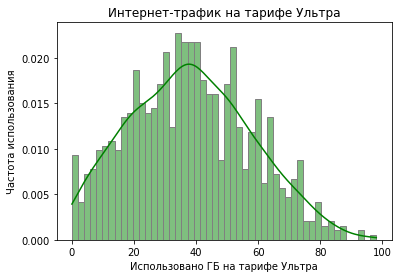

In [22]:
#sns.distplot(data_ultra['gb_used'], hist=True,
#            bins=20, color='green', hist_kws={'edgecolor':'grey'}).set_title('Интернет-трафик на тарифе Ультра')
sns.histplot(data_ultra['gb_used'],
             bins=50, kde=True,
             stat="density", linewidth=1,
             edgecolor = 'grey',
             color='green').set_title('Интернет-трафик на тарифе Ультра')
# Названия осей
plt.xlabel('Использовано ГБ на тарифе Ультра')
plt.ylabel('Частота использования')

# Юзеры, превысившие лимит
gb_excess_ultra_revenue = ((1 - ultra_price*(data_ultra['month'].count()) / data_ultra['spent_this_month'].sum()) * 100).round(1)
#gb_excess=((1-1950*(data_ultra['month'].count()) / data_ultra['spent_this_month'].sum())*100).round(1)
print(gb_excess_ultra_revenue, '% от выручки тарифа Ультра составляет превышение потребления трафика')


print ((data_ultra['gb_used'] > tariffs.iloc[1]['gb_included']).sum() * tariffs.iloc[1]['rub_per_gb'],
       'руб. - ''Выручка за избыточный трафик составила')

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> 

Кажется, во втором print уже нужно использовать столбец по интернету, а не по выручке
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил на `gb_used` в последней строке, поменял цифры в выводах.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
 
Лучше не использовать цифры в коде, а обращаться к соответствующим полям таблицы тарифов
    
Также рекомендую строить гистограммы по разным тарифам на одном графике или рядом, чтобы было удобнее их сравнивать
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Да, верное замечание исправил там, где это было необходимо.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2 ✔️:</b>
    
Рада, что ты это дорабатываешь :)

</div>

### Вывод 2.4.
* Половина юзеров проговаривает в среднем 500 мин за месяц, что составляет 1/6 часть от лимита в 3000 минут. Очевидно, что популярность общения по мобильной связи неуклонно снижается.
* Большая часть клиенов не отправили ни одного смс. В эру смартфонов смс используется в основном для взаимодействия с сервисами, а не для общения.
* <b>49.3 % (93 450 руб.) от выручки тарифа Ультра составляет превышение потребления трафика. Оператор зарабатывает в основном на продаже трафика</b>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
 
С первыми 2 пунктами абсолютно согласна, хорошая идея сравнивать с лимитом
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера  ❌:</b> 
    
Оставляю комментарий, так как после правильного округления гигабайт 3 пункт вывода может немного измениться
</div>

<div class="alert alert-info"> <b>Комментарий студента v2:</b> Третий пункт актулен.</div>

## 3.2. Анализ тарифа Smart
Минуты разговора в тарифе Смарт

Примерно 2.0 % выручки тарифа Смарт идет от превышения лимита на звонки по мобильной сети


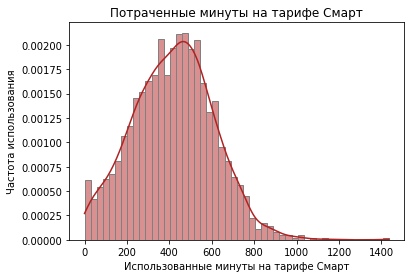

In [23]:
#sns.distplot(data_smart['calls_duration'], hist=True,
#            bins=50, color='FireBrick', hist_kws={'edgecolor':'grey'}).set_title('Потраченные минуты на тарифе Смарт')
sns.histplot(data_smart['calls_duration'],
             bins=50, kde=True,
             stat="density", linewidth=1,
             edgecolor = 'grey',
             color='FireBrick').set_title('Потраченные минуты на тарифе Смарт')
# Названия осей
plt.xlabel('Использованные минуты на тарифе Смарт')
plt.ylabel('Частота использования')

# Выручка по превышению лимитов разговоров
#min_excess_smart = ((1-550*(data_smart['month'].count()) / data_smart['spent_this_month'].sum())*100).round(1)
minutes_excess_count_smart = data_smart.query("calls_duration > 500")['calls_duration'].sum() - data_smart.query('calls_duration > 500')['calls_duration'].count()*500
print('Примерно', ((minutes_excess_count_smart*3 / data_smart['spent_this_month'].sum())*100).round(2),
      '% выручки тарифа Смарт идет от превышения лимита на звонки по мобильной сети')

Примерно 0.28 % выручки тарифа Смарт идет от превышения лимита СМС


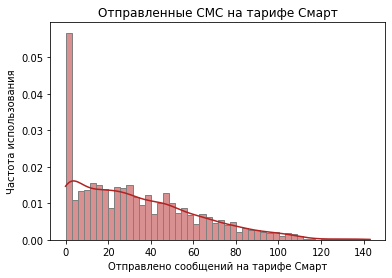

In [24]:
#sns.distplot(data_smart['messages_sum'], hist=True,
#            bins=50, color='FireBrick', hist_kws={'edgecolor':'grey'}).set_title('Отправленные СМС на тарифе Смарт')
sns.histplot(data_smart['messages_sum'],
             bins=50, kde=True,
             stat="density", linewidth=1,
             edgecolor = 'grey',
             color='FireBrick').set_title('Отправленные СМС на тарифе Смарт')
# Названия осей
plt.xlabel('Отправлено сообщений на тарифе Смарт')
plt.ylabel('Частота использования')

messages_excess_count_smart = data_smart.query('messages_sum > 50')['messages_sum'].sum() - data_smart.query('messages_sum > 50')['messages_sum'].count()*50
print('Примерно', ((messages_excess_count_smart*3 / data_smart['spent_this_month'].sum())*100).round(2),
      '% выручки тарифа Смарт идет от превышения лимита СМС')

91.2 % от выручки составляет превышения потребления трафика
422600 руб. - выручка за избыточный трафик составила


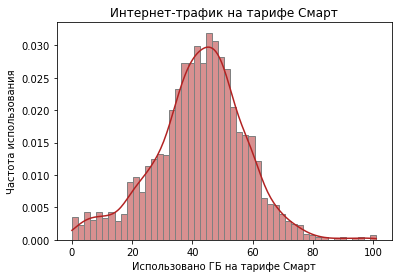

In [25]:
#sns.distplot(data_smart['gb_used'], hist=True,
#            bins=20, color='FireBrick', hist_kws={'edgecolor':'grey'}).set_title('Интернет-трафик на тарифе Смарт')
sns.histplot(data_smart['gb_used'],
             bins=50, kde=True,
             stat="density", linewidth=1,
             edgecolor = 'grey',
             color='FireBrick').set_title('Интернет-трафик на тарифе Смарт')
# Названия осей
plt.xlabel('Использовано ГБ на тарифе Смарт')
plt.ylabel('Частота использования')

# Юзеры, превысившие лимит
#gb_excess = (1 - 1950*(data_ultra['month'].count()) / data_ultra['spent_this_month'].sum()) * 100
gb_excess_smart_revenue=((1-550*(data_smart['month'].count()) / data_smart['spent_this_month'].sum())*100).round(1)
print(gb_excess_smart_revenue, '% от выручки составляет превышения потребления трафика')
print ((data_smart['gb_used'] > tariffs.iloc[0]['gb_included']).sum()*tariffs.iloc[0]['rub_per_gb'], 'руб. - ''выручка за избыточный трафик составила')

### Вывод 2.5.
* На превышении лимитов по звонкам и СМС в тарифе смарт компания зарабатывает около 3,3%
* Большая часть клиенов не отправили ни одного смс. В эру смартфонов смс используется в основном для взаимодействия с сервисами, а не для общения.
* <b>91.2 % (422 600 руб.) от выручки тарифа Смарт составляет превышение потребления трафика. Львиная доля заработка.</b>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
 
Супер, что ты считаешь проценты превышения
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера  ❌:</b> 
    
Оставляю комментарий, так как после правильного округления гигабайт цифры в выводе возможно придется поменять
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Внес требуемые изменения.</div>

## 4. Проверка гипотез
### 4.1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
<b>Н₀</b> - гипотеза о том, что средние наших выборок равны

<b>Н₁</b> - гипотеза о том, что средняя выручка тарифов Смарт и Ультра различаются

Т.к. дисперсии наших выборок отличаются будем использовать метод `scipy.stats.ttest_ind (array1, array2, equal_var = False)`
Критический уровень значимости зададим 5%.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
 
Нулевая и альтернативная гипотезы сформулированы правильно
</div>

In [26]:
alpha = 0.05

results = st.ttest_ind(data_smart['spent_this_month'], data_ultra['spent_this_month'], equal_var=False)
print('P-value', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу Н₀')
else:
    print('Гипотезу Н₀ не удалось отвергнуть')


P-value 3.3350983697032437e-132
Отвергаем нулевую гипотезу Н₀


### <i>Вывод 4.1.</i>
Нулева гипотеза о равенстве средних наших выборок не подтвердилась. Это говорит нам о том, что вероятность случаейного совпадения наших выборок ничножно мало.

А значит альтернативную гипотезу о различии средних выручек на разных тарифах принимаем за потенциально верную.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
 
Нулевая гипотеза и не может подтвердиться. Корректнее "вероятность получить такие или еще более экстремальные значения средних при условии правильности нулевой гипотезы"
</div>

### 4.2. Cредняя выручка пользователей из Москвы отличается от выручки пользователей в регионах.
* <b>Н₀</b> - гипотеза о том, что средняя выручка тарифов Смарт и Ультра одинаковы

* <b>Н₁</b> - гипотеза о том, средние наших выборок различаются

<div class="alert alert-danger">
<b>Комментарий ревьюера  ❌:</b> 
    
Здесь H0 и H1 перепутаны
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Теперь всё верно!.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2 ✔️:</b>
    
Ура :)

</div>

In [27]:
# Создадим таблицы с клиентами из Москвы и регионов:
moscow = data[data['city'] == 'Москва']
regions = data[data['city'] != 'Москва']

# Проверим соотношение пользователей разных тарифов в наших выборках
moscow.pivot_table(index='tariff', values='spent_this_month', aggfunc='count')
regions.pivot_table(index='tariff', values='spent_this_month', aggfunc='count')

# Пора проверять гипотезу
alpha = 0.05

results = st.ttest_ind(moscow['spent_this_month'],
                       regions['spent_this_month'],
                       equal_var=False)
print('P-value', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу Н₀')
else:
    print('Гипотезу Н₀ не удалось отвергнуть')

P-value 0.2656875417083935
Гипотезу Н₀ не удалось отвергнуть


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
 
Код проверки гипотез правильный,  результат тоже :)
</div>

### <i>Вывод 4.2.</i>
* Нелевую гипотезу не удалось отвергнуть, значит выручка в Москве и регионах различатся.
* Альтернативную гипотезу об одинаковости выручки в Москве и регионах не принимаем.

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>

По гипотезе о Москве и регионах
    
На самом деле на основе статистических тестов мы не можем сделать вывод, что не отличается. Если гипотеза не отвергается, то она при этом не принимается. У нас может быть просто недостаточно доказательств пока что(размер выборки небольшой, например)
    
https://allatambov.github.io/psms/pdf/hypo-test.pdf
    
Лучше писать просто, что не удалось отвергнуть, статистически значимых отличий нет
    
Также нулевая гипотеза не про различия, а, наоборот, про равенство. Я писала выше, что формулировки были перепутаны 
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил формулировки на верные.</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v2 ⚠️:</b> 
    
Кажется, здесь пропущено "не": Нелевую гипотезу не удалось отвергнуть, значит выручка в Москве и регионах различатся.
    
Ведь нулевая гипотеза про то, что выручки не отличаются. Кроме того здесь когда гипотеза не отвергается, лучше просто писать, что не отвергается. Из того, что она не отвергается не следует то, что выручка в Москве и регионах не различатся
    
</div>

<div class="alert alert-info"> <b>Комментарий студента v2:</b> Исправлено, благодарю за привлечение внимания.</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v3 ⚠️:</b> 
    
Нулевая гипотеза - гипотеза о том, что средняя выручка тарифов Смарт и Ультра одинаковы

Альтернативная - гипотеза о том, средние наших выборок различаются
    
Вместо:
    
    Нелевую гипотезу не удалось отвергнуть, значит выручка в Москве и регионах различатся.
    Альтернативную гипотезу об одинаковости выручки в Москве и регионах не принимаем
    
Корректно писать так:
    
    Нелевую гипотезу не удалось отвергнуть, статистически значимых различий нет.
    Альтернативную гипотезу о различии выручек в Москве и регионах не принимаем
</div>

## 5. Общие выводы

<b>Тариф Смарт для компании является самым выгодным в плане заработка, т.к. в абсолютном выражении на нём компания заработывает больше только на продаже Интернета сверх лимитов, чем общая выручка по тарифу Ультра.</b>
* Большинство людей перстали использовать СМС как средство связи друг с другом.
* Звонками по мобильной сети на обоих тарифах люди пользуются примерно одинаково.
* Больше половины клиентов выходят за лимиты предоставляемого объема трафика
* От 49% до 91% выручки компания имеет на продаже трафика сверх тарифных лимитов

<i>Мобильный Интернет является главной статьей заработка компании.</i> Голосовая связь и смс медленно, но верно уходят на второй план.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>

Отличный вывод, содержит все промежуточные выводы :)
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера  ❌:</b> 
 
Ответь, пожалуйста, на главный вопрос исследования - какой тариф выгоднее для компании и почему

Также возможно после правильного округления гигабайт вывод придется поправить
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Дал развернутый ответ на главный вопрос с довыдами!
Исправил цифры после округления ГБ</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2 ✔️:</b>

Согласна с твоими рассуждениями
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>

<b>Проект выполнен очень хорошо. Делаются грамотные выводы, выбраны подходящие графики, код довольно чистый, вижу хорошее владение pandas/python :) 
    
Поправь, пожалуйста, то, что обозначено красными комментариями ❌, желтые оставляю на твое усмотрение :)</b>
</div>